Warning message:
"package 'ggplot2' was built under R version 3.4.3"Warning message:
"Removed 2949 rows containing non-finite values (stat_bin)."

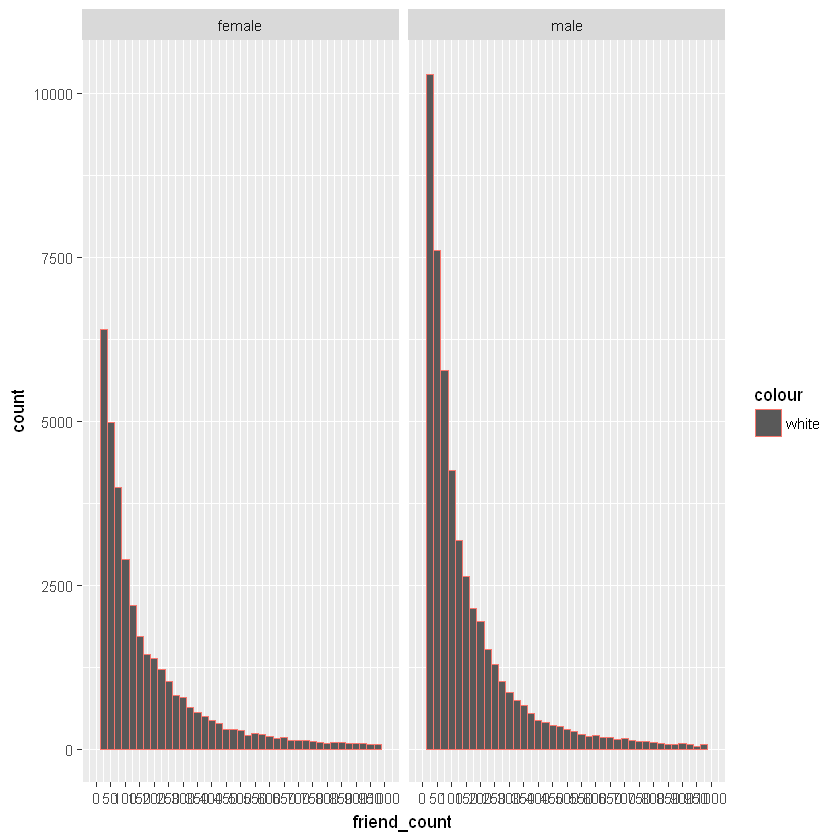

In [1]:
# df = read.csv('pseudo_facebook.tsv', sep = "\t")

df = read.delim('pseudo_facebook.tsv')

#head(df,3)

library(ggplot2)

## Previously we noticed male users have more friends than the female users
qplot(x=friend_count, data=subset(df, !is.na(gender)), binwidth=25, color='white')+
    scale_x_continuous(limits=c(0,1000), breaks=seq(0,1000,50))+
    facet_wrap(~gender)

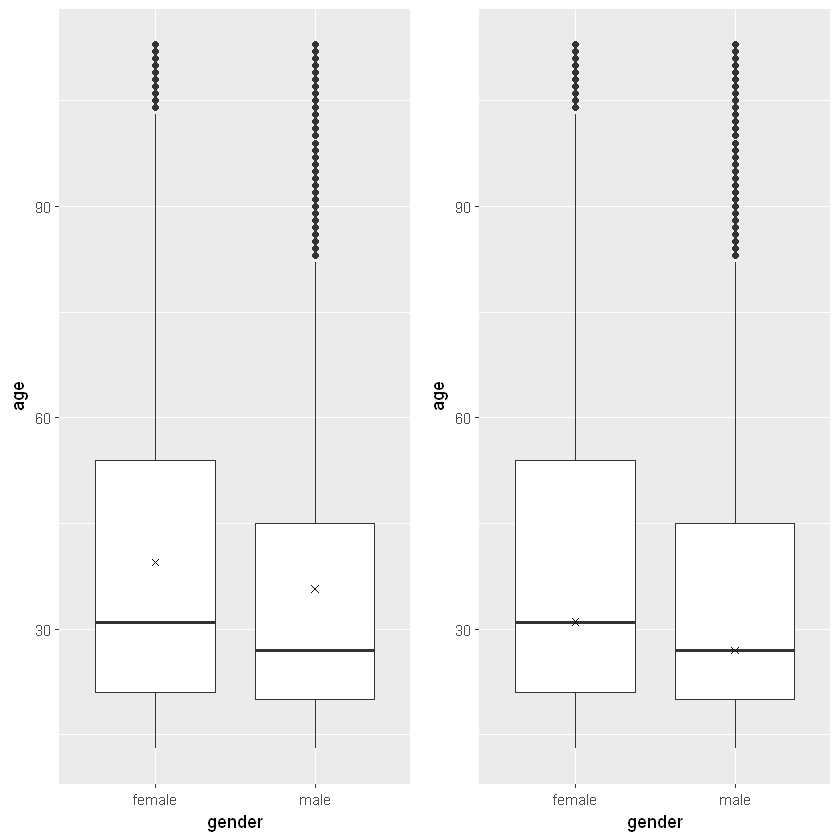

In [2]:
## Third qualitative variable
## Lets explore how does age vary with gender
library(gridExtra)

p1 = ggplot(aes(x=gender, y=age), data=subset(df, !is.na(gender))) +
    geom_boxplot() +
    stat_summary(fun.y=mean, geom='point', shape=4 )

## We can see, mean age for female>male's
## Lets try median age

p2 = ggplot(aes(x=gender, y=age), data=subset(df, !is.na(gender))) +
    geom_boxplot() +
    stat_summary(fun.y=median, geom='point', shape=4 )
grid.arrange(p1,p2, ncol=2)

## We may wonder, is this because, female users have diff age distr?
## No differnece in the two plots


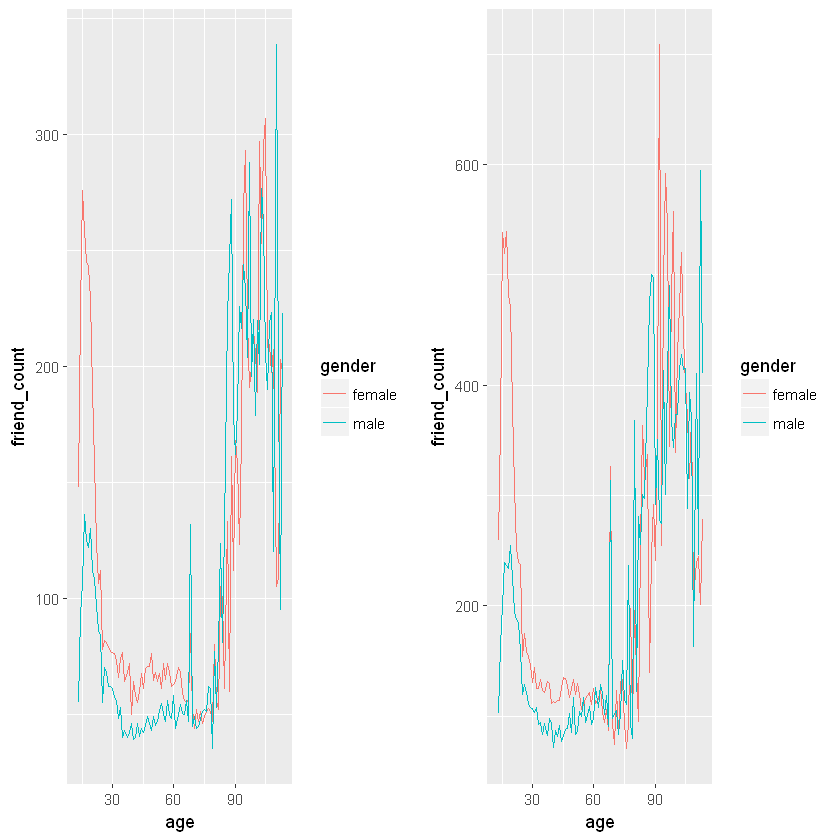

In [3]:
p1 = ggplot(aes(x=age, y=friend_count), data=subset(df, !is.na(gender))) +
    geom_line(aes(color=gender), stat='summary', fun.y=median) 
p2 = ggplot(aes(x=age, y=friend_count), data=subset(df, !is.na(gender))) +
    geom_line(aes(color=gender), stat='summary', fun.y=mean) 

grid.arrange(p1,p2,ncol=2)
## So we can see below that women on avg have more friend count until 65-70
## and then it gets little noisy

In [27]:
## Lets group/divide the data by age, gender using dplyr package

# Versn 0.4.0 dplyr has a bug when using the median func on the summarize layer
# need to cast the data as a numeric (float) type .e.g. median(as.numeric(var)).

# Write code to create a new data frame,
# called 'pf.fc_by_age_gender', that contains
# information on each age AND gender group.

# The data frame should contain the following variables:

#    mean_friend_count,
#    median_friend_count,
#    n (the number of users in each age and gender grouping)

# Here is an example of the structure of your data frame. Your
# data values will be different. Note that if you are grouping by
# more than one variable, you will probably need to call the
# ungroup() function. 

#   age gender mean_friend_count median_friend_count    n
# 1  13 female          247.2953                 150  207
# 2  13   male          184.2342                  61  265
# 3  14 female          329.1938                 245  834
# 4  14   male          157.1204                  88 1201

library(dplyr)


df.fc_by_age_gender = df %>%
       group_by(age, gender) %>%
        summarise(mean_friend_count = mean(friend_count),
                 median_friend_count = median(as.numeric(friend_count)),
                 n = n()) %>%
        ungroup() ## No '%>%' after the last term
## Bcoz we are using more than one var in groupby
#  arrange(age)

head(df.fc_by_age_gender)


age,gender,mean_friend_count,median_friend_count,n
13,female,259.1606,148.0,193
13,male,102.1340,55.0,291
14,female,362.4286,224.0,847
14,male,164.1456,92.5,1078
15,female,538.6813,276.0,1139
15,male,200.6658,106.5,1478


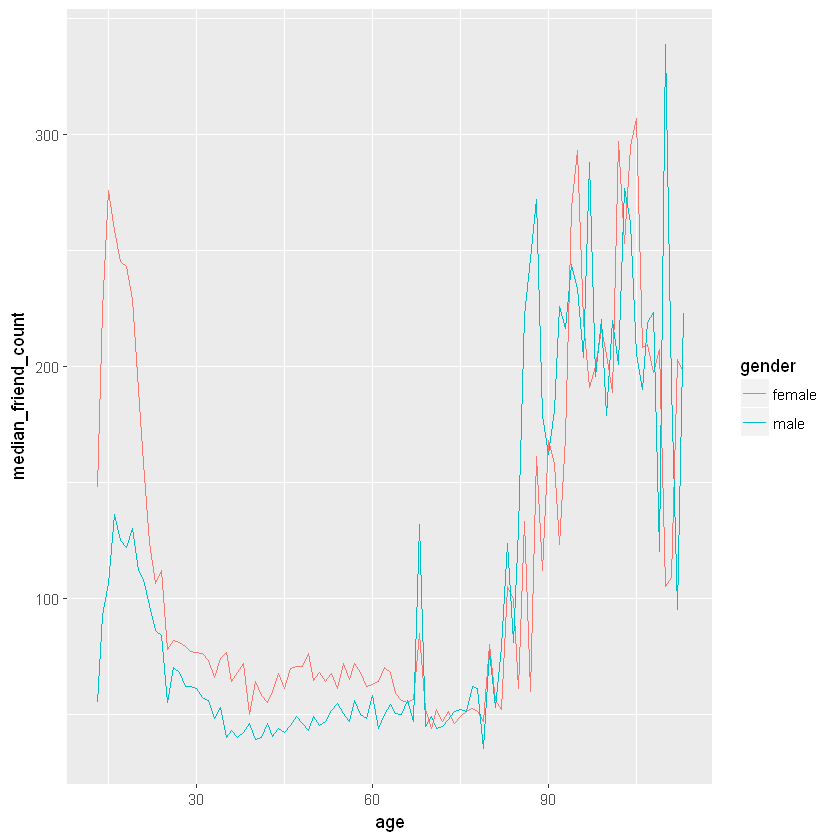

In [29]:
# Create a line graph showing the median friend count over the ages
# for each gender. Be sure to use the data frame you just created,
# pf.fc_by_age_gender.

ggplot(aes(x=age, y=median_friend_count), data=subset(df.fc_by_age_gender, !is.na(gender))) +
    geom_line(aes(color=gender))

## We can see gender diff in the median friend count pronounced for younger people
## Lets try to figure out how many times more friends does a femal user have on avg

In [38]:
## Think in ratios:

# # Lets reshape the data:
# age	gender	mean_friend_count	median_friend_count	n
# 13	female	259.1606	148.0	193
# 13	male	102.1340	55.0	291

# # Make it
# age	female(median fc)	male(median fc)
# 13	148.0	55.0

## We need tidyr/reshape2 package to do that
library(tidyr)

## wide to long: gather()
## long to wide: spread()
#http://www.cookbook-r.com/Manipulating_data/Converting_data_between_wide_and_long_format/

df2 = spread(subset(df.fc_by_age_gender, 
       select = c('gender', 'age', 'median_friend_count'), !is.na(gender)), 
       gender, median_friend_count)
## We just need three cols from the df df.fc_age_gender
## and there is exchange of info b/n gender & median_fc cols
head(df2)

## Oops we have NA

age,female,male
13,148.0,55.0
14,224.0,92.5
15,276.0,106.5
16,258.5,136.0
17,245.5,125.0
18,243.0,122.0


In [39]:
# Using tidyr package in combination with dplyr

df.fc_by_age_gender.wide <-
  subset(df.fc_by_age_gender[c('age', 'gender', 'median_friend_count')],
         !is.na(gender)) %>%
  spread(gender, median_friend_count) 
  
head(df.fc_by_age_gender.wide)

age,female,male
13,148.0,55.0
14,224.0,92.5
15,276.0,106.5
16,258.5,136.0
17,245.5,125.0
18,243.0,122.0


In [40]:
## Taking the ratio of median_fc for male:female:

df.fc_by_age_gender.wide <-
  subset(df.fc_by_age_gender[c('age', 'gender', 'median_friend_count')],
         !is.na(gender)) %>%
  spread(gender, median_friend_count) %>%
  mutate(ratio = male / female)

head(df.fc_by_age_gender.wide)

age,female,male,ratio
13,148.0,55.0,0.3716216
14,224.0,92.5,0.4129464
15,276.0,106.5,0.3858696
16,258.5,136.0,0.5261122
17,245.5,125.0,0.5091650
18,243.0,122.0,0.5020576


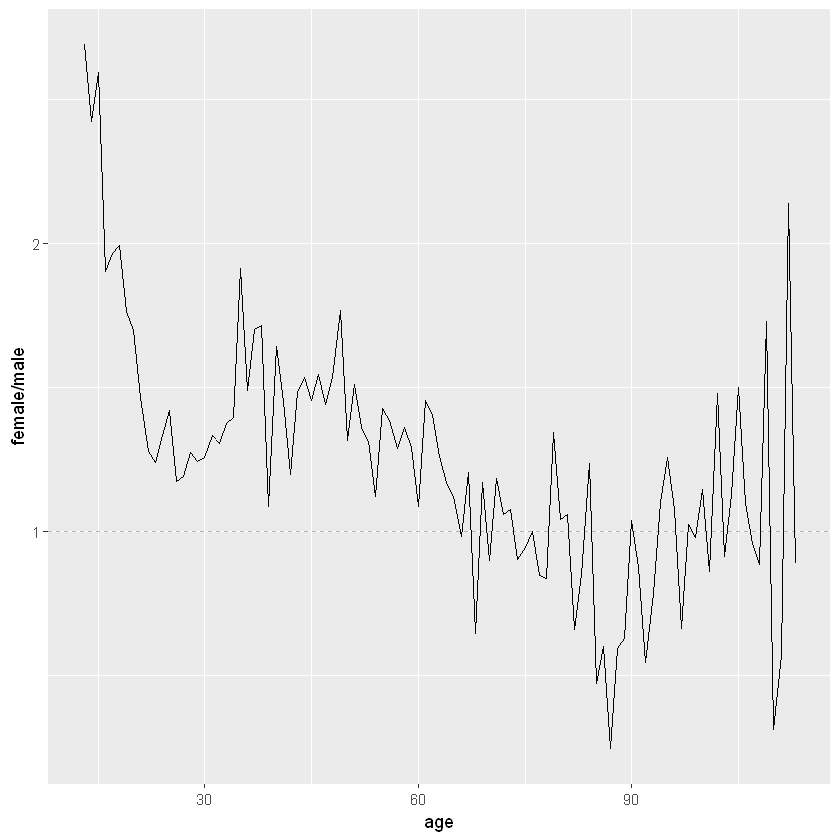

In [54]:
## Plot the ratio vs age:

# Plot the ratio of the female to male median friend counts using the data frame
# pf.fc_by_age_gender.wide. Think about what geom you should use.
# Add a horizontal line to the plot with
# a y intercept of 1, which will be the
# base line. Look up the documentation
# for geom_hline to do that. Use the parameter
# linetype in geom_hline to make the
# line dashed.

# The linetype parameter can take the values 0-6:
# 0 = blank, 1 = solid, 2 = dashed
# 3 = dotted, 4 = dotdash, 5 = longdash
# 6 = twodash

# ggplot(aes(x=age, y=ratio), data=df.fc_by_age_gender.wide) +
#     geom_line() +
#     geom_hline(yintercept=1)

ggplot(aes(x=age, y=female/male), data=df.fc_by_age_gender.wide) +
    geom_line() +
    geom_hline(yintercept=1, alpha=0.3, linetype=2)

## The difference is more striking at younger age...

## One possibility could be that the data is biased
#3 in other words, FB expanded to new geographies
## weher early adoptesr are males, who have low median friend count

## Other possibility could be that young girls are more likely to 
## get friend requests than boys.

In [64]:
## In the last example, we looked at data age and friend count
## across the catagorical variable, gender, usually color and shape
## tend to be aeshthetics 
## What if instead of third categorical variable, we looked at the
## third numeric variable, say tenure,

## Lets explore, all the four varibles collectively

# Create a variable called year_joined in the pf data frame using the variable
# tenure and 2014 as the reference year.

# The variable year joined should contain the year
# that a user joined facebook.

head(df,3) # tenure is in days
# ?round
df$year_joined = 2014-ceiling((df$tenure/365))
head(df,3)

summary(df$year_joined)
table(df$year_joined)

userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,year_joined
2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0,2013
1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0,2013
2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0,2013


userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,year_joined
2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0,2013
1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0,2013
2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0,2013


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   2005    2012    2012    2012    2013    2014       2 


 2005  2006  2007  2008  2009  2010  2011  2012  2013  2014 
    9    15   581  1507  4557  5448  9860 33366 43588    70 

In [70]:
## cut()
## Creating new bins bu converting numeric variables to a factor
## year_joined to year_joined.bucket

## As we can see that in initial years, there were few users
## we shall club the data 

# Create a new variable in the data frame called year_joined.bucket by using
# the cut function on the variable year_joined.

# You need to create the following buckets for the new variable, year_joined.bucket
# Following are the values(not variable) for the year_joined
#  (2004, 2009] / (2009, 2011] / (2011, 2012] / (2012, 2014]


# ?cut 
df$year_joined.bucket = cut(df$year_joined, c(2004, 2009, 2011, 2012, 2014))
## c(boundary values) 
table(df$year_joined.bucket)
table(df$year_joined.bucket, useNA = 'ifany')


(2004,2009] (2009,2011] (2011,2012] (2012,2014] 
       6669       15308       33366       43658 


(2004,2009] (2009,2011] (2011,2012] (2012,2014]        <NA> 
       6669       15308       33366       43658           2 

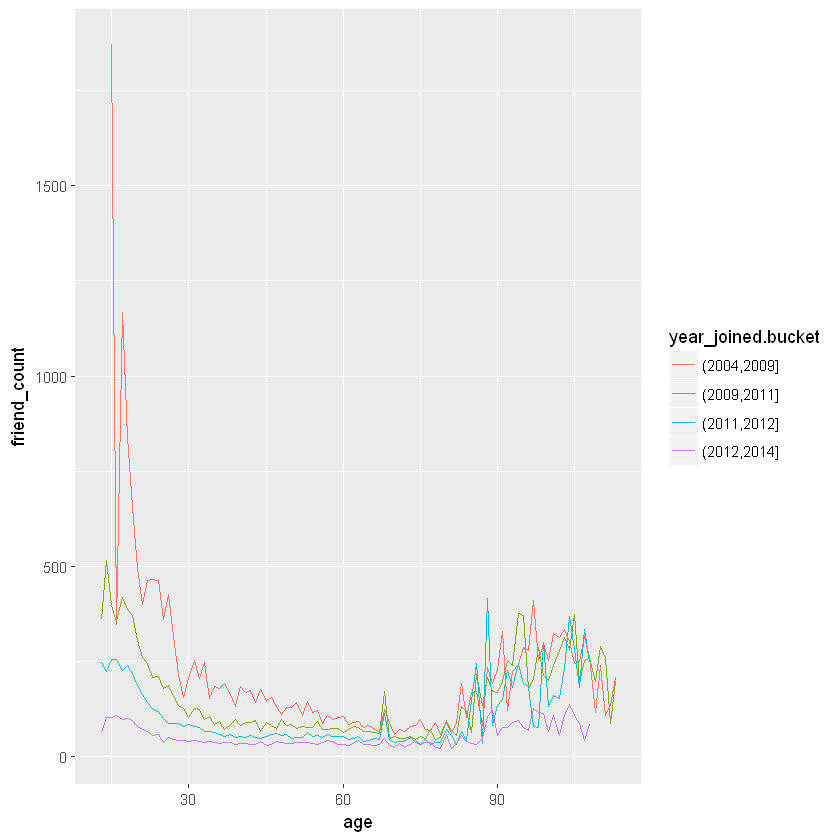

In [71]:
# Create a line graph of friend_count vs. age 
# so that each year_joined.bucket is a line
# tracking the median user friend_count across
# age. This means you should have four different
# lines on your plot.

ggplot(aes(x=age, y=friend_count), data=subset(df, !is.na(year_joined.bucket))) +
    geom_line(aes(color=year_joined.bucket), stat='summary', fun.y=median) 

## Our suscpicion proved correct, ppl with longer tenure tend to have
## higher friend count except for the older users, it looks like
## their friend count is stable irrespective of time they joined

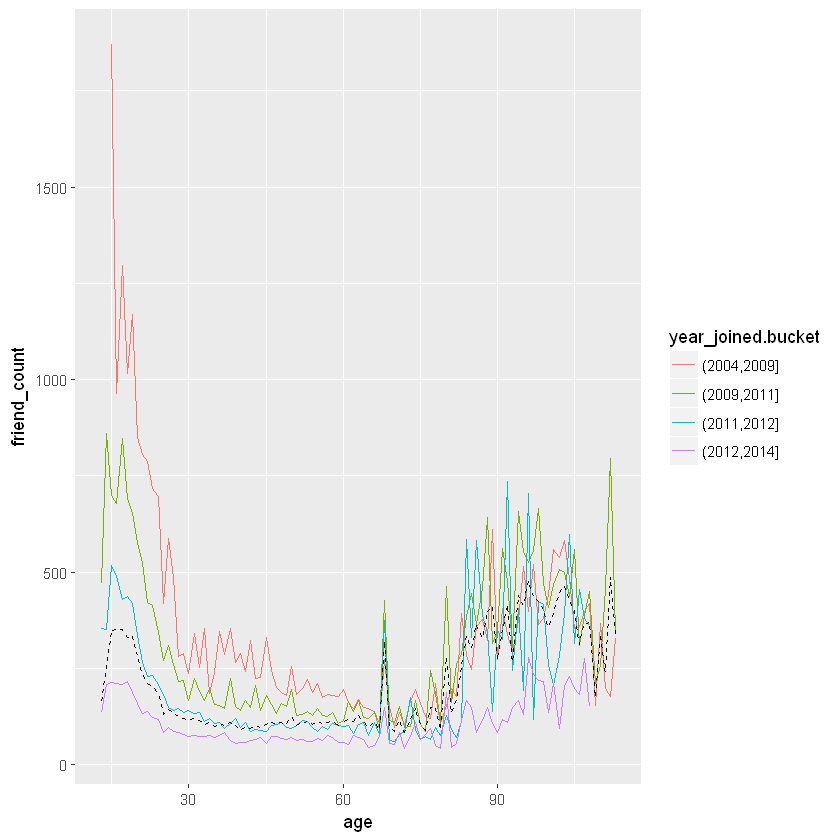

In [79]:
## Lets plot mean and grand mean instead of median
## (1) Add another geom_line to code below
# to plot the grand mean of the friend count vs age.

# (2) Exclude any users whose year_joined.bucket is NA.

# (3) Use a different line type for the grand mean.

# As a reminder, the parameter linetype can take the values 0-6:

# 0 = blank, 1 = solid, 2 = dashed
# 3 = dotted, 4 = dotdash, 5 = longdash
# 6 = twodash


ggplot(aes(x=age, y=friend_count), data=subset(df, !is.na(year_joined.bucket))) +
    geom_line(aes(color=year_joined.bucket), stat='summary', fun.y=mean) +
    geom_line(stat = 'summary', fun.y=mean, linetype = 2) #grand mean

## The grand mean line shows that most of the users are new


In [87]:
## Lets look at it differently, tenure and friend count as a rate instead
## Rate of acquisition of friend each day since joining the service

## Median friend rate, maximum friend rate??


with(subset(df, tenure>=1), summary(friend_count/tenure))

## Median = 0.2205, Mean = 0.609 and Max is 417
## Clearly, there is an outlier

## We have seen that users that have been on FB longer have 
## larger friend count across the ages

## Is friend request same or different across the groups
## Do new users make lot of friend request or the old users
## as they have a bigger network

# Lets explore this

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.0000   0.0775   0.2205   0.6096   0.5658 417.0000 

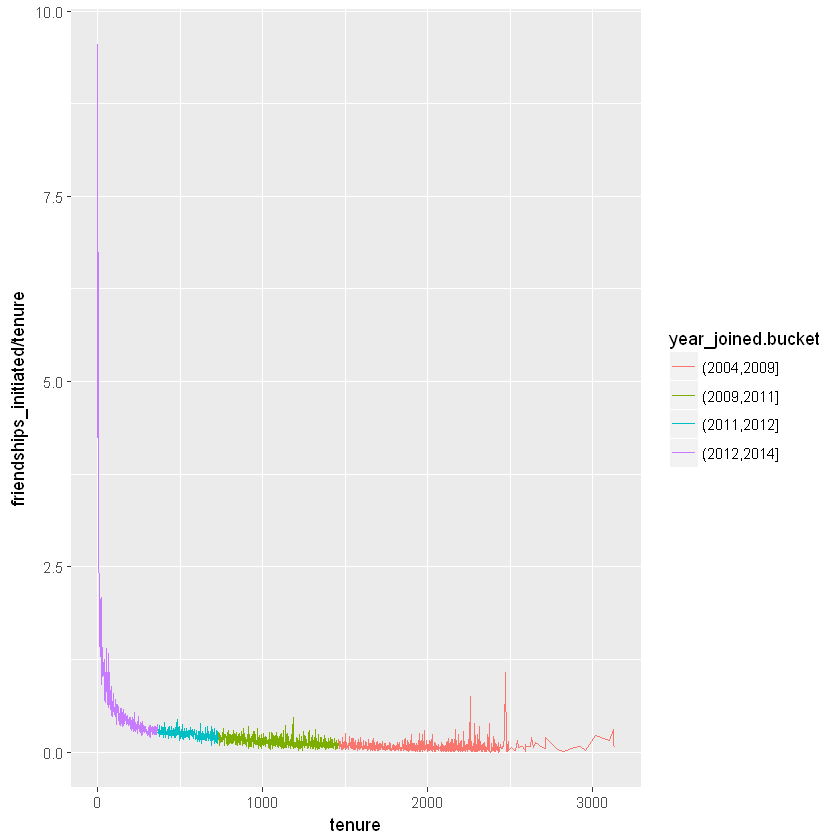

In [88]:
# Create a line graph of mean of friendships_initiated per day (of tenure)
# vs. tenure colored by year_joined.bucket.

# You need to make use of the variables tenure,
# friendships_initiated, and year_joined.bucket.

# You also need to subset the data to only consider user with at least
# one day of tenure.

ggplot(aes(x=tenure, y=friendships_initiated/tenure), data=subset(df, tenure>=1)) +
    geom_line(aes(color=year_joined.bucket), stat='summary', fun.y=mean) 

## It reveals that people with long tenure typically initiate less friendship
## But there is lot of noise, lets try to fix it.

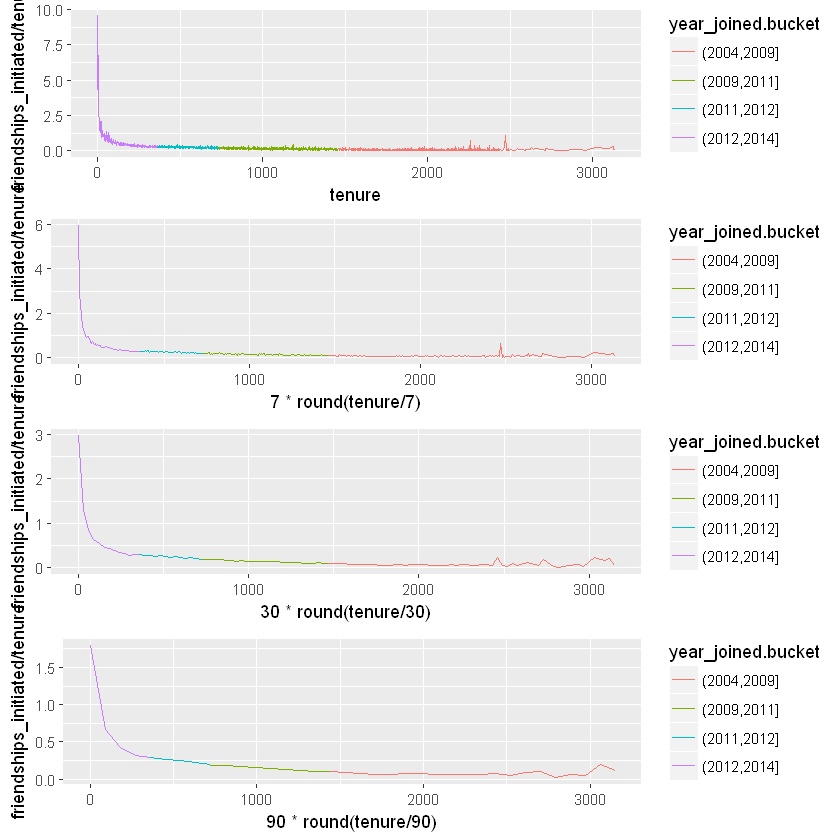

In [91]:
## We can get rid of noise by bending the x axis

## Bias/variance trade-off, high bias less noise and vice versa

p1 = ggplot(aes(x=tenure, y=friendships_initiated/tenure), data=subset(df, tenure>=1)) +
    geom_line(aes(color=year_joined.bucket), stat='summary', fun.y=mean) 

p2 = ggplot(aes(x=7*round(tenure/7), y=friendships_initiated/tenure), data=subset(df, tenure>=1)) +
    geom_line(aes(color=year_joined.bucket), stat='summary', fun.y=mean)

p3 = ggplot(aes(x=30*round(tenure/30), y=friendships_initiated/tenure), data=subset(df, tenure>=1)) +
    geom_line(aes(color=year_joined.bucket), stat='summary', fun.y=mean) 

p4 = ggplot(aes(x=90*round(tenure/90), y=friendships_initiated/tenure), data=subset(df, tenure>=1)) +
    geom_line(aes(color=year_joined.bucket), stat='summary', fun.y=mean) 

library(gridExtra)

grid.arrange(p1,p2,p3,p4, ncol=1)

`geom_smooth()` using method = 'gam'


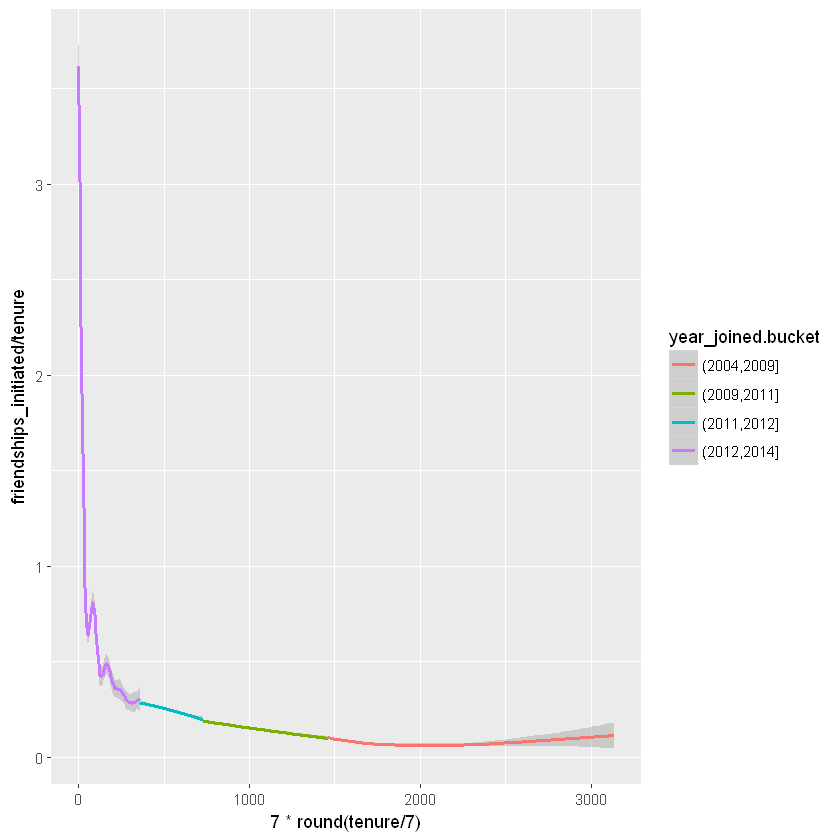

In [97]:
## Instead of using geomline, use geom_smooth()

# ggplot(aes(x=tenure, y=friendships_initiated/tenure), data=subset(df, tenure>=1)) +
#     geom_line(aes(color=year_joined.bucket), stat='summary', fun.y=mean) 

ggplot(aes(x = 7 * round(tenure/7), y = friendships_initiated/tenure),
       data = subset(df, tenure > 0)) +
       geom_smooth(aes(color = year_joined.bucket), method = 'auto')

## Yogurt dataset:

In [111]:
yo = read.csv('yogurt.csv')
head(yo)
str(yo)
# id variable is int, that doesnt make sense, it should be factor
yo$id = as.factor(yo$id) #or simply factor(yo$id)
str(yo)
summary(yo)

obs,id,time,strawberry,blueberry,pina.colada,plain,mixed.berry,price
1,2100081,9678,0,0,0,0,1,58.96
2,2100081,9697,0,0,0,0,1,58.96
3,2100081,9825,0,0,0,0,1,65.04
4,2100081,9999,0,0,0,0,1,65.04
5,2100081,10015,1,0,1,0,1,48.96
6,2100081,10029,1,0,2,0,1,65.04


'data.frame':	2380 obs. of  9 variables:
 $ obs        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ id         : int  2100081 2100081 2100081 2100081 2100081 2100081 2100081 2100081 2100081 2100081 ...
 $ time       : int  9678 9697 9825 9999 10015 10029 10036 10042 10083 10091 ...
 $ strawberry : int  0 0 0 0 1 1 0 0 0 0 ...
 $ blueberry  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pina.colada: int  0 0 0 0 1 2 0 0 0 0 ...
 $ plain      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mixed.berry: int  1 1 1 1 1 1 1 1 1 1 ...
 $ price      : num  59 59 65 65 49 ...
'data.frame':	2380 obs. of  9 variables:
 $ obs        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ id         : Factor w/ 332 levels "2100081","2100370",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ time       : int  9678 9697 9825 9999 10015 10029 10036 10042 10083 10091 ...
 $ strawberry : int  0 0 0 0 1 1 0 0 0 0 ...
 $ blueberry  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pina.colada: int  0 0 0 0 1 2 0 0 0 0 ...
 $ plain      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ mixed.berry: int  1 1 1 1 

      obs               id            time         strawberry     
 Min.   :   1.0   2132290:  74   Min.   : 9662   Min.   : 0.0000  
 1st Qu.: 696.5   2130583:  59   1st Qu.: 9843   1st Qu.: 0.0000  
 Median :1369.5   2124073:  50   Median :10045   Median : 0.0000  
 Mean   :1367.8   2149500:  50   Mean   :10050   Mean   : 0.6492  
 3rd Qu.:2044.2   2101790:  47   3rd Qu.:10255   3rd Qu.: 1.0000  
 Max.   :2743.0   2129528:  39   Max.   :10459   Max.   :11.0000  
                  (Other):2061                                    
   blueberry        pina.colada          plain         mixed.berry    
 Min.   : 0.0000   Min.   : 0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 0.0000   1st Qu.: 0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median : 0.0000   Median : 0.0000   Median :0.0000   Median :0.0000  
 Mean   : 0.3571   Mean   : 0.3584   Mean   :0.2176   Mean   :0.3887  
 3rd Qu.: 0.0000   3rd Qu.: 0.0000   3rd Qu.:0.0000   3rd Qu.:0.0000  
 Max.   :12.0000   Max.   :10.0000   M

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


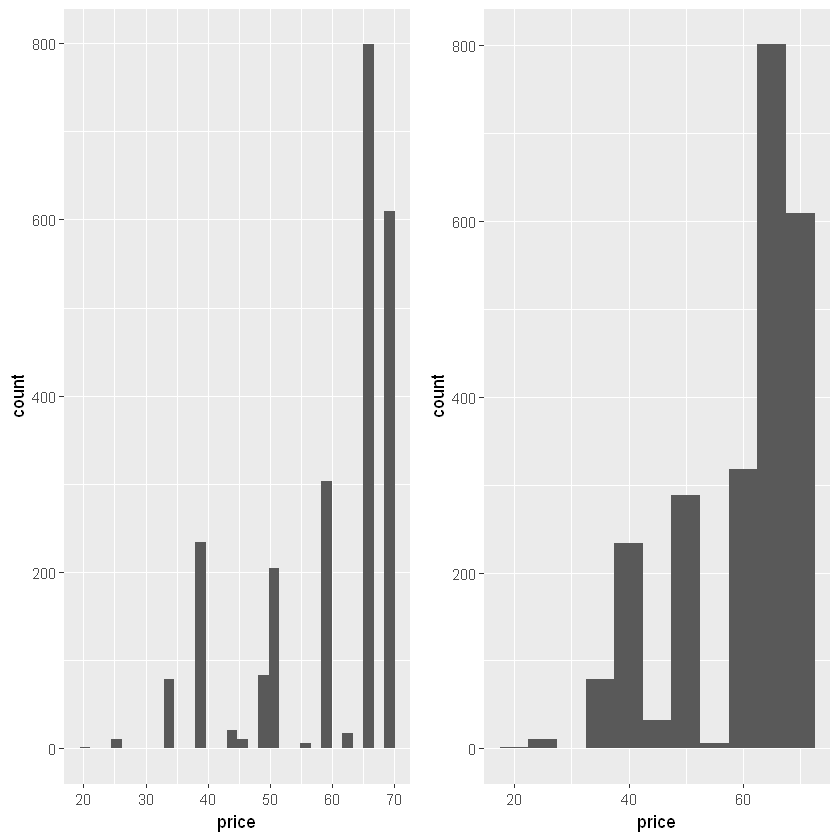

In [110]:
## Create histogram of yogurt prices

library(ggplot2)
q1 = ggplot(aes(x=price), data=yo) +
    geom_histogram()
q2 = ggplot(aes(x=price), data=yo) +
    geom_histogram(binwidth=5)
grid.arrange(q1, q2, ncol=2)

## If we chose a binwidth we miss some of the empty spaces
## What are the other ways, we could have noticed the features of this dataset??

In [115]:
## A very important clue of discreteness was that 75 percentile for price 
## same as the maximum

summary(yo$price)
length(unique(yo$price))
## There are just 20 distinct prices
table(yo$price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.00   50.00   65.04   59.25   68.96   68.96 

[1] 20


   20 24.96 33.04  33.2 33.28 33.36 33.52 39.04    44 45.04 48.96 49.52  49.6 
    2    11    54     1     1    22     1   234    21    11    81     1     1 
   50 55.04 58.96    62 63.04 65.04 68.96 
  205     6   303    15     2   799   609 

In [124]:
#### No of purchases::

## On a given purchase occassion, how many 8 ounce yogurt does
## a household purchase ??

## To answer this, we need to combine accounts of the different yogurt 
## flavor into one variable...all.purchases, which gives the total count
## of yogurts fot each observation/household purchase 

## We need a transform function to do so
# ?transform
yo = transform(yo, 
    all.purchases = strawberry+blueberry+pina.colada+plain+mixed.berry)
head(yo)

obs,id,time,strawberry,blueberry,pina.colada,plain,mixed.berry,price,all.purchases
1,2100081,9678,0,0,0,0,1,58.96,1
2,2100081,9697,0,0,0,0,1,58.96,1
3,2100081,9825,0,0,0,0,1,65.04,1
4,2100081,9999,0,0,0,0,1,65.04,1
5,2100081,10015,1,0,1,0,1,48.96,3
6,2100081,10029,1,0,2,0,1,65.04,4


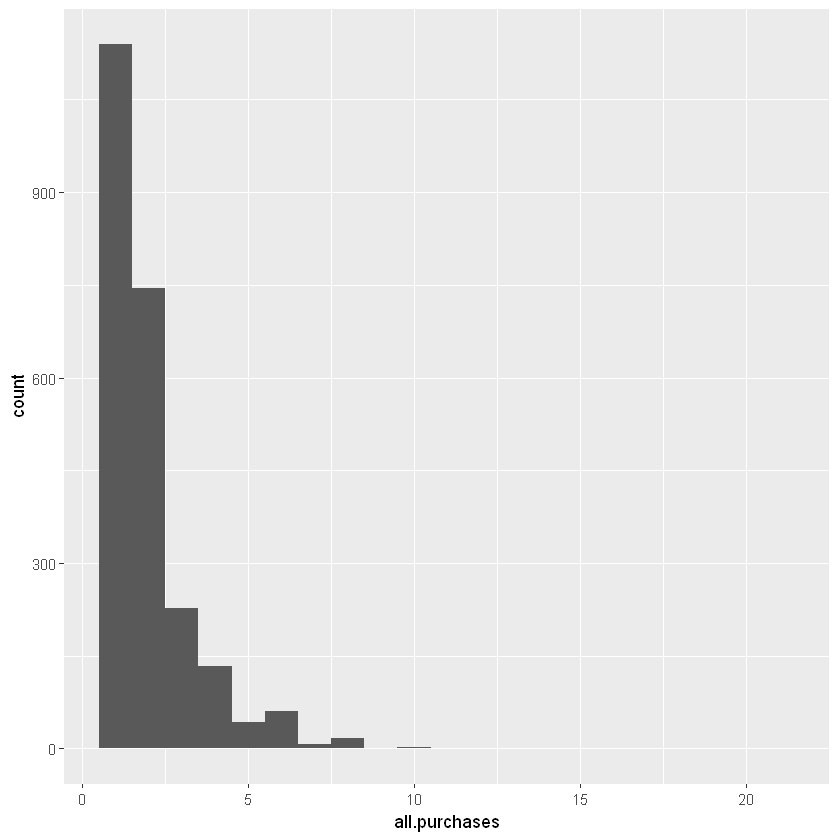

In [126]:
ggplot(aes(x=all.purchases), data=yo) +
    geom_histogram(binwidth=1)
## We can see a household purchases somewhere 1 to 10 yogurts
## at a time

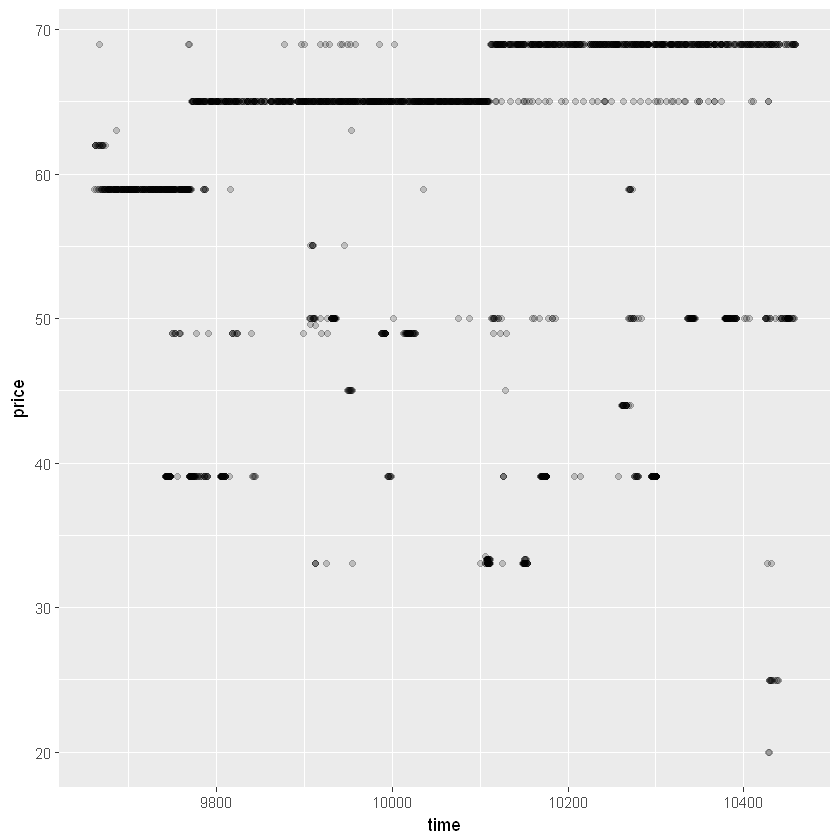

In [129]:
# Lets dig deeper into yogurt prices and house hold behaviour

# Lets investigate price over time in detail
## Unlike facebook data, here we have data on same household
## overtime.
# Create a scatterplot of price vs time.

# This will be an example of a time series plot.

# Resolve overplotting issues by using

ggplot(aes(x = time, y = price), data=yo) +
    geom_point(alpha=1/5) 

## We can see the modal price or most common price increasing
## over time.
## lets look at within and b/n household variations
## How often house holds buy yogurt?
## How often they buy multiple type of yogurts?
## What prices they are buying at?

## Lets pick 16 households at random and analyse

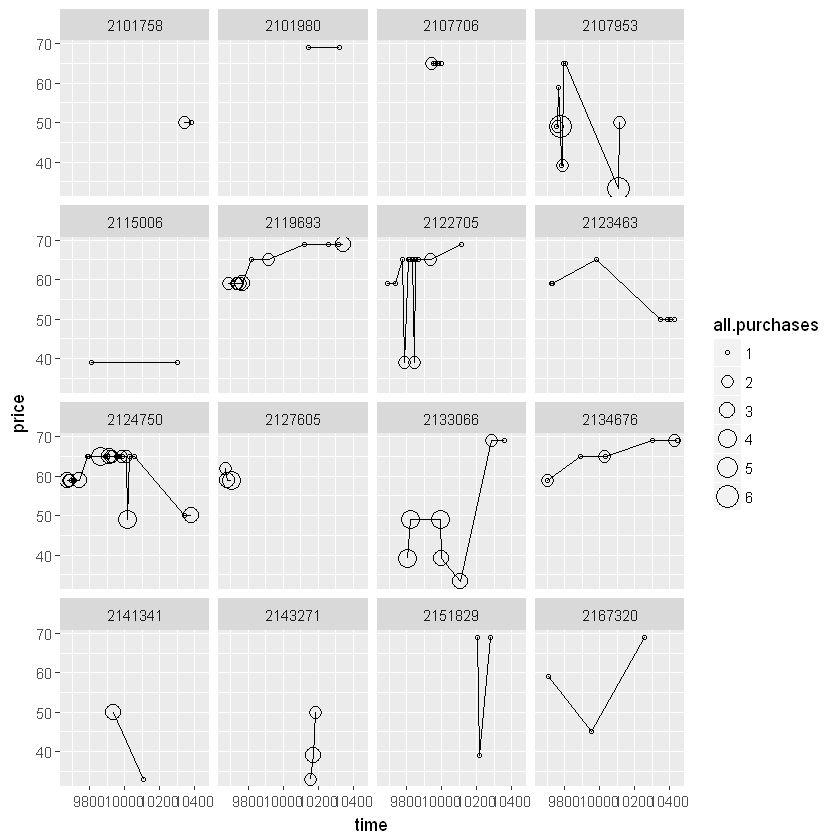

In [130]:
##
set.seed(4230)
sample.ids = sample(levels(yo$id), 16)

ggplot(aes(x=time, y=price), 
       data = subset(yo, id %in% sample.ids)) +
        facet_wrap(~id) +
        geom_line() +
        geom_point(aes(size = all.purchases), pch=1)
    

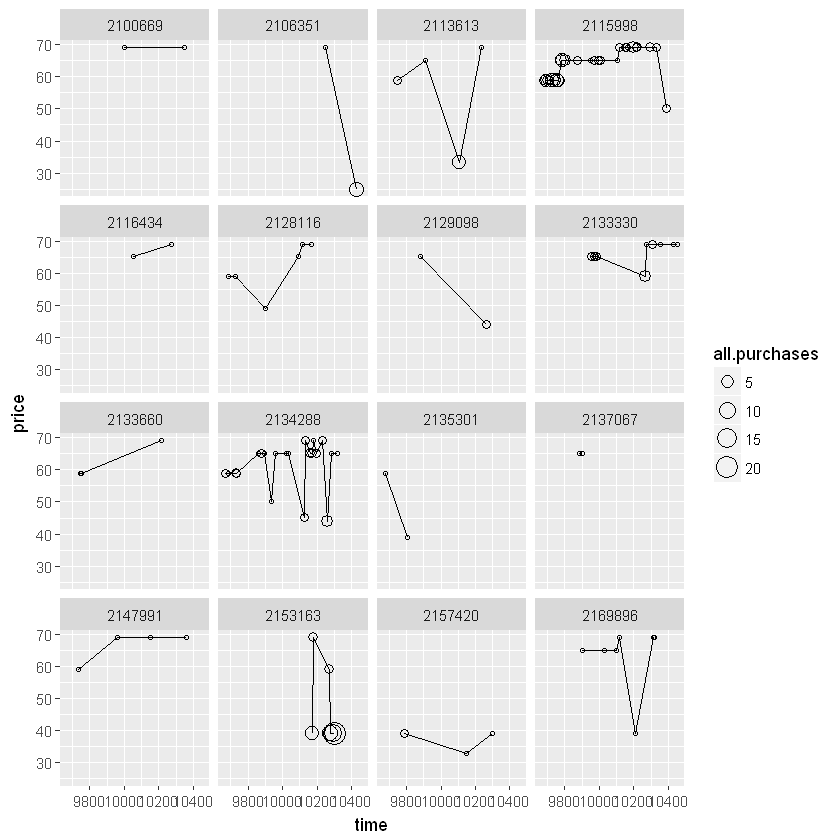

In [131]:
set.seed(1234)
sample.ids = sample(levels(yo$id), 16)

ggplot(aes(x=time, y=price), 
       data = subset(yo, id %in% sample.ids)) +
        facet_wrap(~id) +
        geom_line() +
        geom_point(aes(size = all.purchases), pch=1)
    

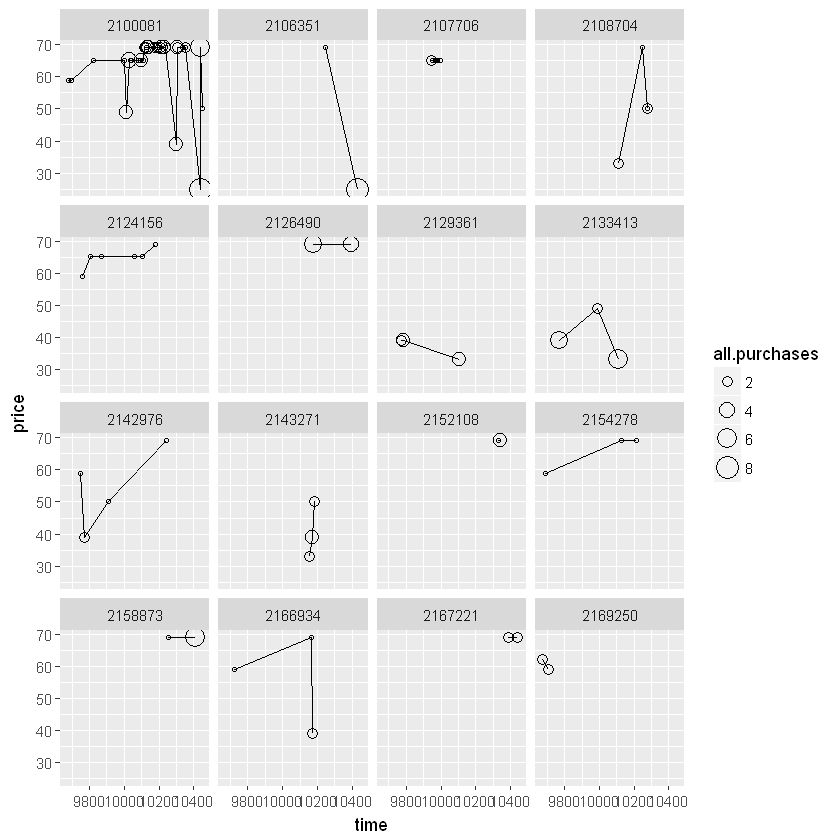

In [132]:
set.seed(1111)
sample.ids = sample(levels(yo$id), 16)

ggplot(aes(x=time, y=price), 
       data = subset(yo, id %in% sample.ids)) +
        facet_wrap(~id) +
        geom_line() +
        geom_point(aes(size = all.purchases), pch=1)
    

In [133]:
# Scatter plot matrices

#3 Scatter plots are great, but they are not suited for all types of
# variables, for example categorical variables
# So, there can be other types of visualisations like box plots
# histograms, 
## BEST PART OF SCATTER_PLOT_MATRICES is that it creates different types
## plots for different types of combination of variables
## This is just a starting point and can further be fine tuned.

## This matrix is very helpful when we have a large no of variables
## even more than in the pseudo facebook dataset

install.packages('GGally', repos='http://cran.us.r-project.org')
library(GGally)

also installing the dependencies 'prettyunits', 'progress', 'reshape'



package 'prettyunits' successfully unpacked and MD5 sums checked
package 'progress' successfully unpacked and MD5 sums checked
package 'reshape' successfully unpacked and MD5 sums checked
package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rkuma\AppData\Local\Temp\RtmpMzHgap\downloaded_packages


Warning message:
"package 'GGally' was built under R version 3.4.3"
Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa



[1] "age"                   "dob_day"               "dob_year"             
 [4] "dob_month"             "gender"                "tenure"               
 [7] "friend_count"          "friendships_initiated" "likes"                
[10] "likes_received"        "mobile_likes"          "mobile_likes_received"
[13] "www_likes"             "www_likes_received"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."`stat_bin()` using `bins = 30`

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."`stat_bin()` using `bins = 30`

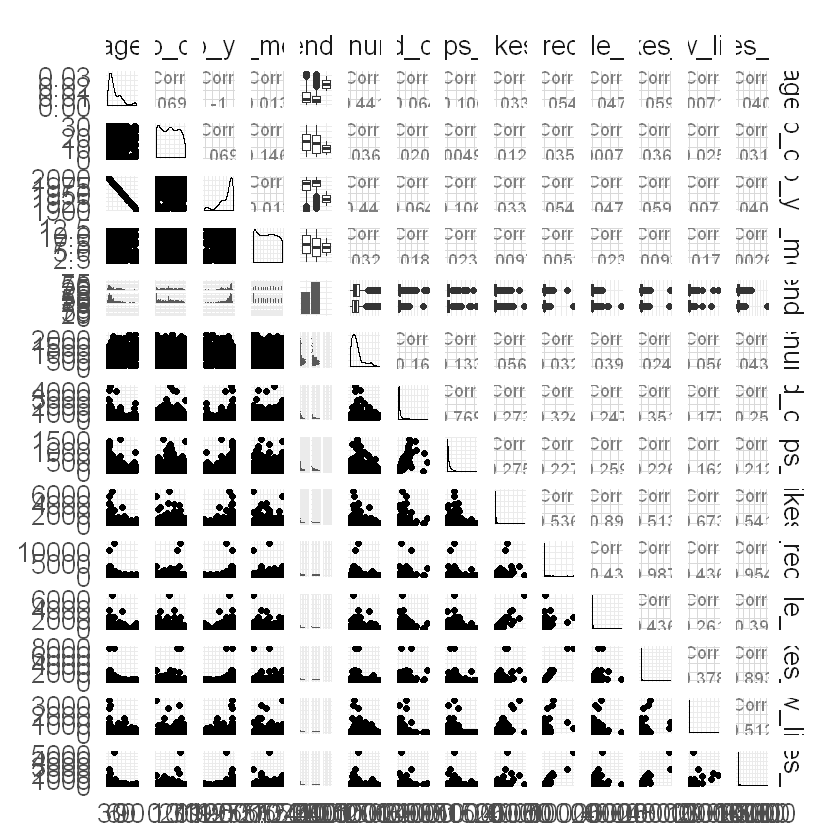

In [142]:
theme_set(theme_minimal(20))

set.seed(1836)
df_subset = df[,c(2:15)] #we dont want id, year joined, year joined bcket
names(df_subset)
## We are gonna create a scatterplot b/n every pair of variables
ggpairs(df_subset[sample.int(nrow(df_subset), 1000), ])

ggsave("scatter_plot_matrics.png", width=24, height=24)

In [ ]:
## Heat Map:




## Practice problem set

In [ ]:
# Create a histogram of diamond prices. Facet the histo by diamond color
# and use cut to color the histogram bars.

# The plot should look something like http://i.imgur.com/b5xyrOu.jpg

# Note: In the link, a color palette of type 'qual' was used to color 
# the histogram using-> scale_fill_brewer(type = 'qual')

In [165]:
head(diamonds)
summary(diamonds$price)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    326     950    2401    3933    5324   18823 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


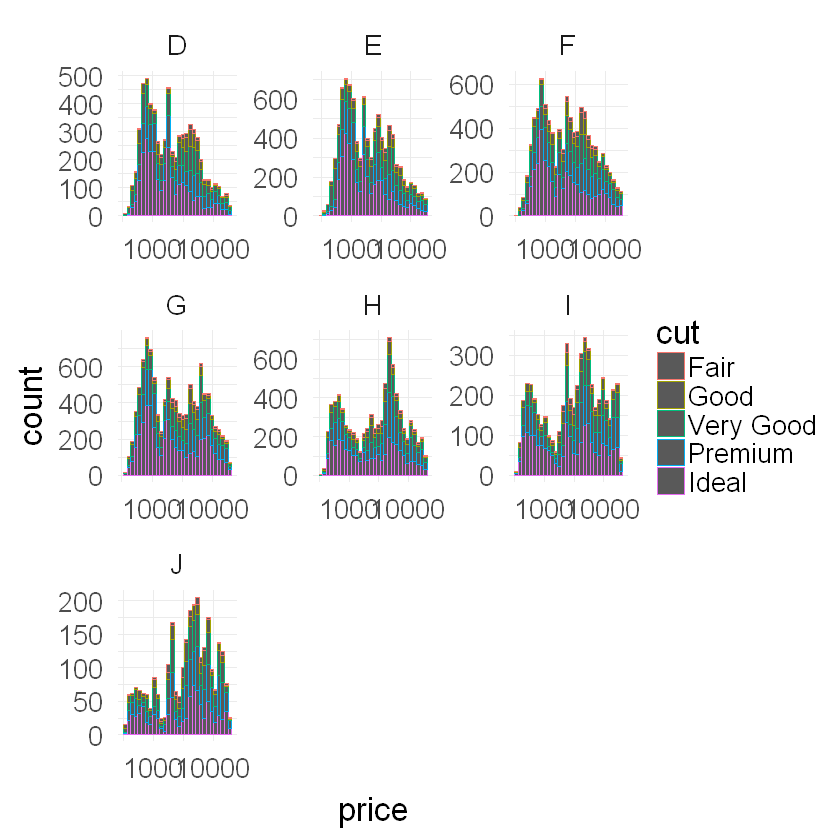

In [173]:
# any(is.na(diamonds$price)) #Returns FALSE
ggplot(aes(x=price), data=diamonds) +
    geom_histogram(aes(color=cut)) +
    facet_wrap(~color, scales='free') + 
# here color is the column, a factor
# If we want diff y axis for each plot, we can use an argument 
# scales='free' in facet_wrap()
    scale_fill_brewer(type = 'qual') +
    scale_x_log10() 
#We use log scale for x bcoz we have a big range

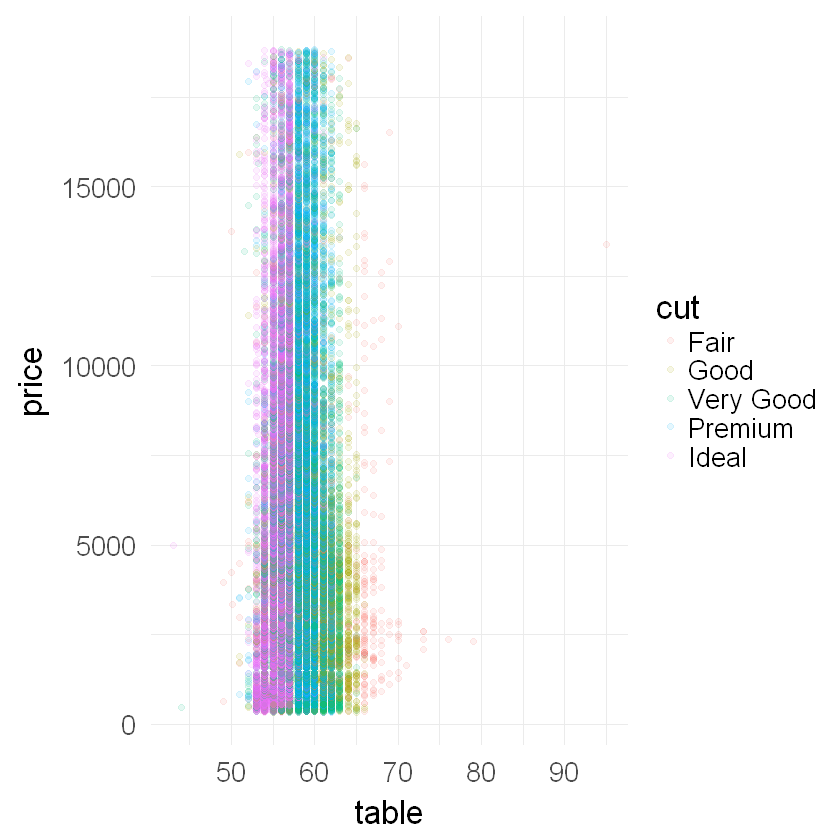

In [177]:
# Create a scatterplot of diamond price vs table and color the 
# points by the cut of the diamond.

# The plot should look something like-> http://i.imgur.com/rQF9jQr.jpg
# Note: In the link, a color palette of type
# 'qual' was used to color the scatterplot using
# scale_color_brewer(type = 'qual')

ggplot(aes(x=table, y=price), data=diamonds) +
    geom_point(aes(color=cut), alpha=0.1) +
     scale_fill_brewer(type = 'qual') 

diamonds$cut: Fair
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  49.00   56.00   58.00   59.05   61.00   95.00 
------------------------------------------------------------ 
diamonds$cut: Good
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  51.00   56.00   58.00   58.69   61.00   66.00 
------------------------------------------------------------ 
diamonds$cut: Very Good
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  44.00   56.00   58.00   57.96   59.00   66.00 
------------------------------------------------------------ 
diamonds$cut: Premium
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  51.00   58.00   59.00   58.75   60.00   62.00 
------------------------------------------------------------ 
diamonds$cut: Ideal
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  43.00   55.00   56.00   55.95   57.00   63.00 

Warning message:
"Removed 4850 rows containing missing values (geom_point)."

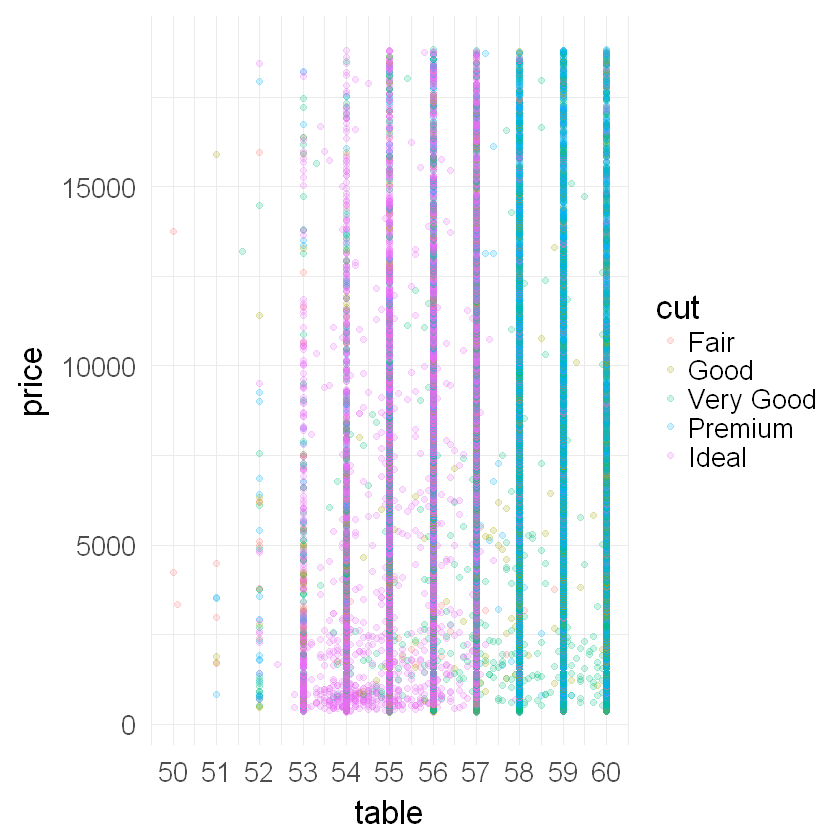

In [194]:
## What is the typical table range for the majority of diamonds
## of ideal cut and premium cut?

by(diamonds$table, diamonds$cut, summary) #we can use max/min/summary/mean
## The answer obtained from the above is not deemed correct
## Can we find it using plot??

# ggplot(aes(x=table, y=price), data=subset(diamonds, cut=c('premium', 'ideal'))) +
#     geom_point(alpha=0.1) 
# #  It is not very clear, lets do one by one
# ggplot(aes(x=table, y=price), data=subset(diamonds, cut='premium')) +
#     geom_point(alpha=0.1) 

## Lets focus on the area of ineterst...I dont kow how to do it


ggplot(aes(x=table, y=price), data=diamonds) +
    geom_point(aes(color=cut), alpha=0.2) +
    scale_x_continuous(limits = c(50, 60), breaks=seq(50,60,1))
## 53-57 and 58-60

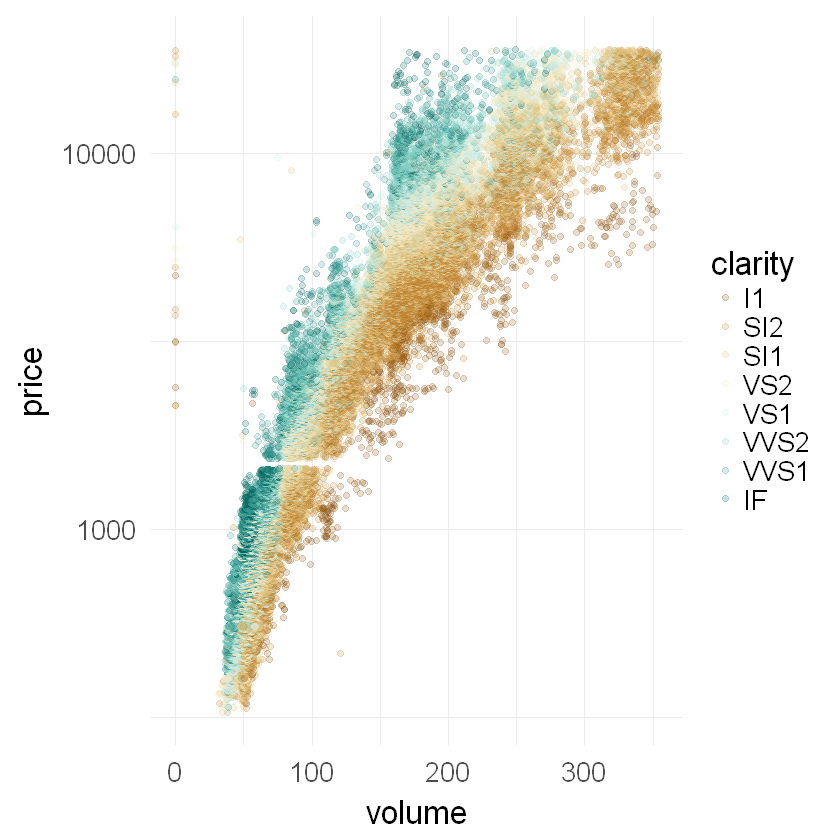

In [199]:
# Create a scatterplot of diamond price vs. volume (x * y * z) and 
# color the points by the clarity of diamonds. 
# Use scale on the y-axis to take the log10 of price. You should also
# omit the top 1% of diamond volumes from the plot.

# Note: Volume is a very rough approximation of a diamond's actual volume.

# The plot should look something like this.
# http://i.imgur.com/excUpea.jpg

# Note: In the link, a color palette of type
# 'div' was used to color the scatterplot using
# scale_color_brewer(type = 'div')

diamonds$volume=diamonds$x * diamonds$y *diamonds$z
## I am wondering, if there is an easier method of doing so??

## I am not sure, how to omit top 1% of diamond volumes from the plot??

ggplot(aes(x=volume, y=price), 
       data=subset(diamonds, volume<=quantile(volume,0.99))) +
    geom_point(aes(color=clarity), alpha=0.2) +
    scale_y_log10() + # coord_trans(y="log10") also works
    scale_color_brewer(type = 'div')

In [210]:
# Many interesting variables are derived from two or more others.
# For example, we might wonder how much of a person's network on
# a service like Facebook the user actively initiated. Two users
# with the same degree (or number of friends) might be very
# different if one initiated most of those connections on the
# service, while the other initiated very few. So it could be
# useful to consider this proportion of existing friendships that
# the user initiated. This might be a good predictor of how active
# a user is compared with their peers, or other traits, such as
# personality (i.e., is this person an extrovert?).

# Your task is to create a new variable called 'prop_initiated'
# in the Pseudo-Facebook data set. The variable should contain
# the proportion of friendships that the user initiated.

# df1=subset(df, friend_count>0)
# df1$prop_initiated = df1$friendships_initiated/df1$friend_count
# head(df1)
# ## This way I think, we will lose lots of data
# ## Grader says to use ifelse

df$prop_initiated = ifelse(df$friend_count==0, 0, df$friendships_initiated/df$friend_count)
head(df)

userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,year_joined,year_joined.bucket,friend_rate,prop_initiated
2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0,2013,"(2012,2014]",0,0
1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0,2013,"(2012,2014]",0,0
2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0,2013,"(2012,2014]",0,0
1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0,2013,"(2012,2014]",0,0
1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0,2013,"(2012,2014]",0,0
1524765,14,1,1999,12,male,15,0,0,0,0,0,0,0,0,2013,"(2012,2014]",0,0


Warning message:
"Removed 2 rows containing non-finite values (stat_summary)."

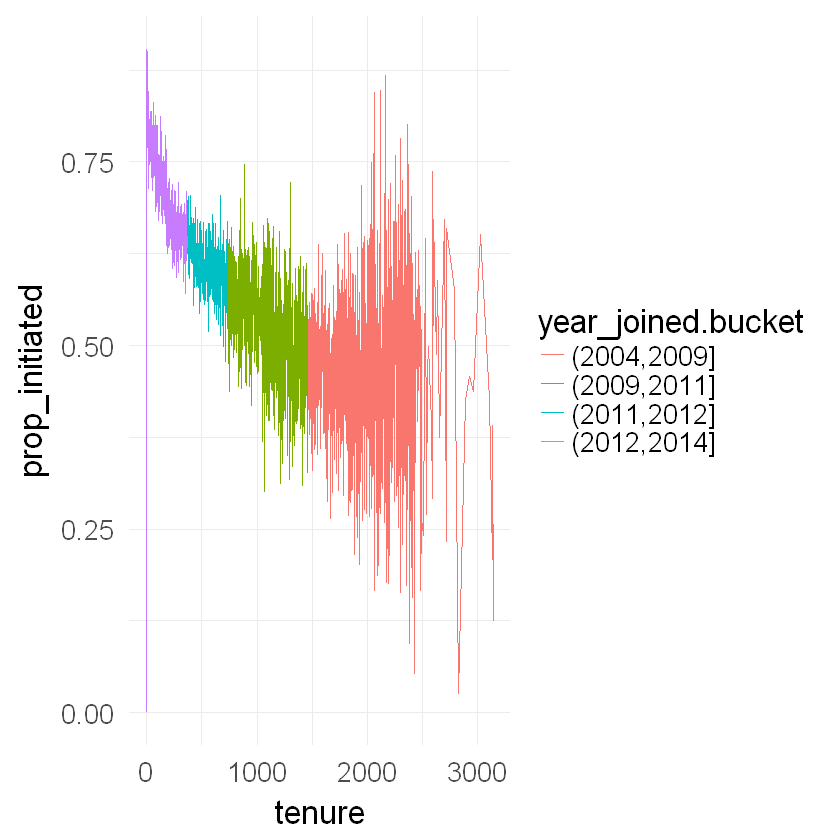

In [211]:
# Create a line graph of the median proportion of friendships initiated 
# ('prop_initiated') vs. tenure and color the line segment by
# year_joined.bucket.

# Recall, we created year_joined.bucket in Lesson 5
# by first creating year_joined from the variable tenure.
# Then, we used the cut function on year_joined to create
# four bins or cohorts of users.

# (2004, 2009] - (2009, 2011] - (2011, 2012] - (2012, 2014]

# The plot should look something like: http://i.imgur.com/vNjPtDh.jpg

ggplot(aes(y=prop_initiated, x=tenure), data=df) + 
    geom_line(aes(color=year_joined.bucket), stat='summary', fun.y=median)

`geom_smooth()` using method = 'gam'
Warning message:
"Removed 2 rows containing non-finite values (stat_smooth)."

[1] 0.6430155

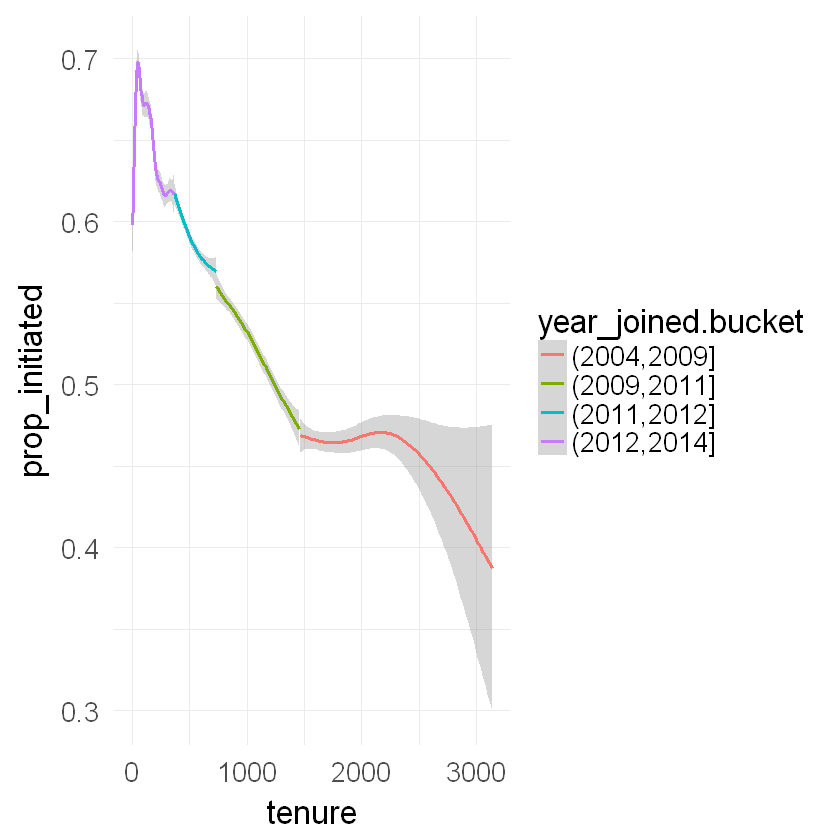

In [217]:
# Smooth the last plot you created of prop_initiated vs tenure colored by
# year_joined.bucket. You can bin together ranges
# of tenure or add a smoother to the plot.

ggplot(aes(y=prop_initiated, x=tenure), data=df) + 
    geom_smooth(aes(color=year_joined.bucket), method = 'auto')

## On an avg, which grp initiated greatest proportion of friendship??
## Ans: ppl who joined after 2012

## For the grp which initiated greatest proportion of friendship??
## what's the grp's mean proportion of friendship initiated?
## Ans: 
DF = subset(df, !is.na(year_joined.bucket))
## We are getting NA tha is simply bcoz, we have some NA 
mean(DF[DF$year_joined.bucket=="(2012,2014]",]$prop_initiated)

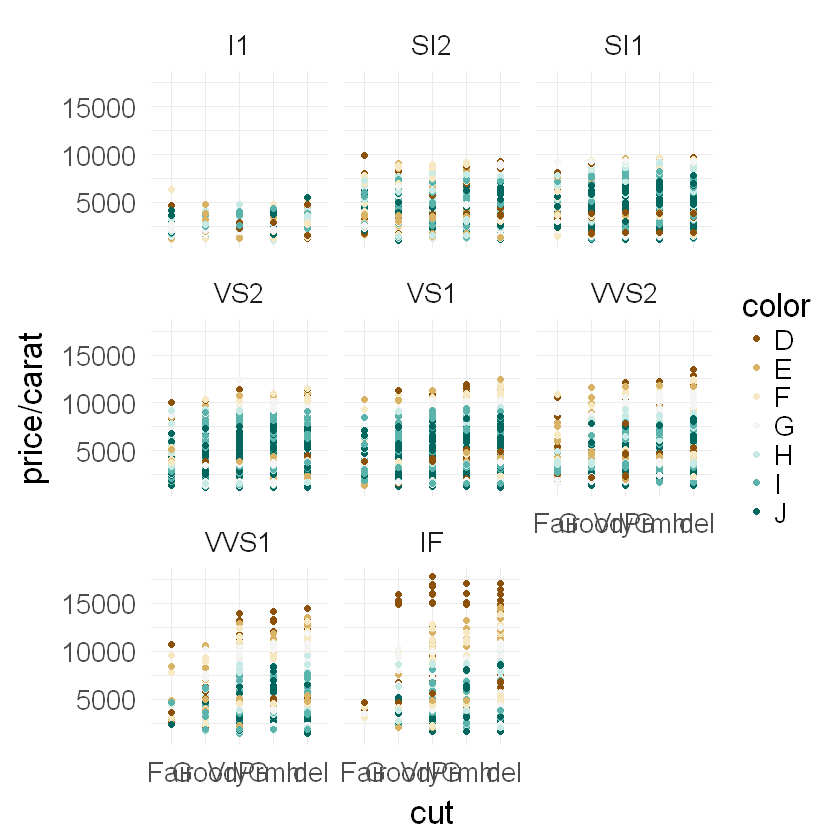

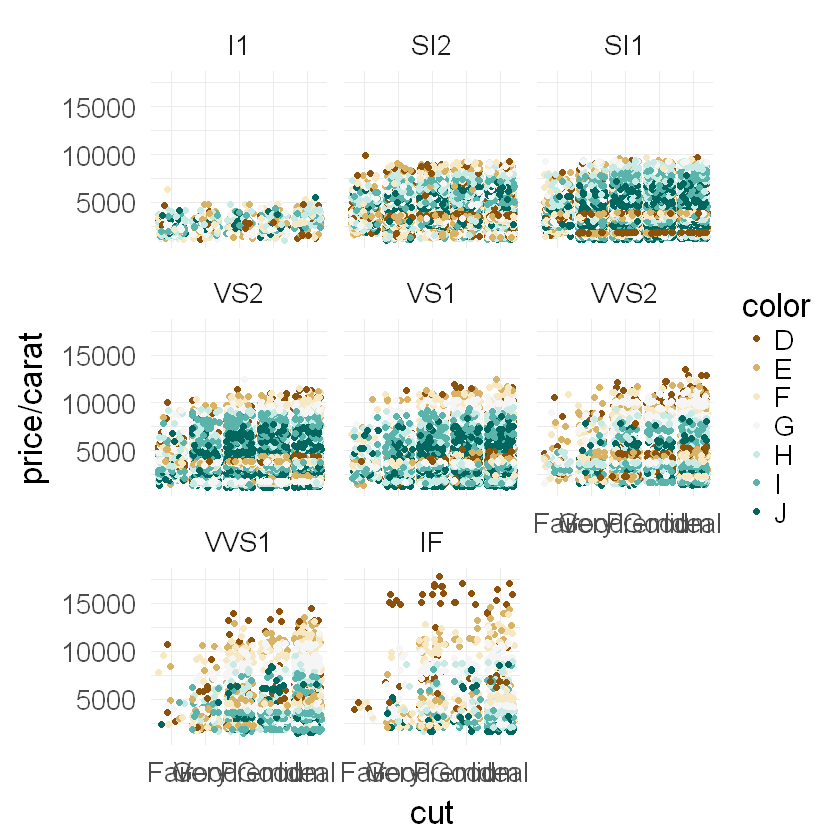

In [238]:
# Create a scatter plot of the price/carat ratio of diamonds. 
# The variable x should be assigned to cut. The points should be colored
# by diamond color, and the plot should be faceted by clarity.

# The plot should look something like: http://i.imgur.com/YzbWkHT.jpg.

# Note: In the link, a color palette of type
# 'div' was used to color the histogram using
# scale_color_brewer(type = 'div')

# any(is.na(df$carat)) #No NA values

## Run each of the following and see the difference:

ggplot(aes(x=cut, y=price/carat), data=subset(diamonds, carat>0)) +
    geom_point(aes(color=color)) +
    facet_wrap(~clarity) +
    scale_color_brewer(type = 'div') +
    scale_x_discrete(labels = abbreviate)

ggplot(aes(x=cut, y=price/carat), data=subset(diamonds, carat>0)) +
    geom_jitter(aes(color=color)) +
    facet_wrap(~clarity) +
    scale_color_brewer(type = 'div')     